#Аналитика данных постапокалиптического бункера

Визуализируем и проанализируем данные, выведенные ранее написанными запросами. Выгружаем выведенные запросами бд таблицы как csv файлы через UI DBeaver, после этого с помощью pandas и seaborn будем их визуализировать

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#Употребление медикаментов поселенцами

In [31]:
med_data = pd.read_csv('/content/_select_m_med_type_count_as_count_from_cd_person_p_join_cd_medic_202305121438.csv')
med_data.head()

,med_type,count
0,Ant Nectar,30
1,Buffout,30
2,UltraJet,27
3,Radaway,26
4,RadShield,26


Визуализируем данные по запросу употребления поселенцами медикаментов

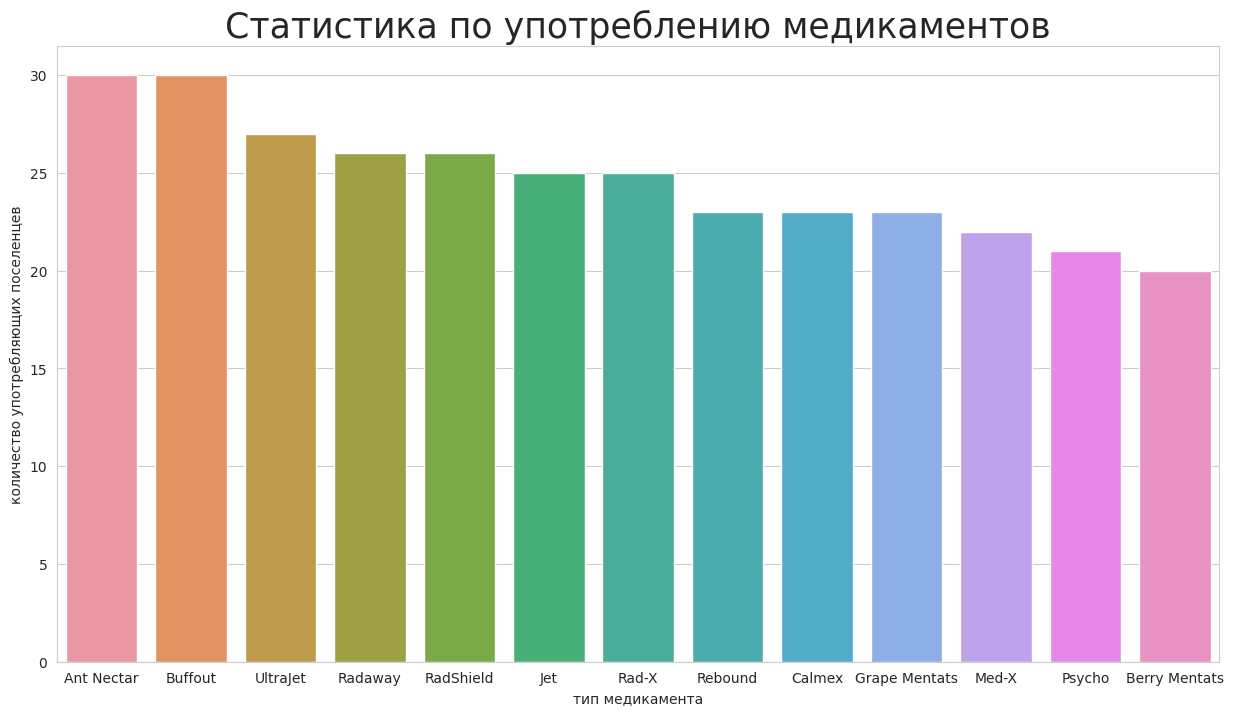

In [32]:
plt.figure(figsize=(15, 8))

with sns.axes_style("whitegrid"):

    sns.barplot(data=med_data, x='med_type', y='count')
    plt.title('Статистика по употреблению медикаментов', fontsize=25)
    plt.xlabel('тип медикамента')
    plt.ylabel('количество употребляющих поселенцев')

    plt.show();

Чаще всего поселенцы принимают Ant Nectar, реже всего berry mentats

#Затрата сил на каждый из типов задач

Проранжировать по количеству затрачиваемых сил оборудование и привязанные к нему типы задач

In [33]:
appl_data = pd.read_csv('/content/_select_t_task_type_a_appl_type_stamina_req_rank_over_order_by_s_202305121503.csv')
appl_data.head()

,task_type,appl_type,stamina_req,rank
0,Hunting,Weapons Range,100,1
1,Electricity maintainance,Elictricity generator,90,2
2,Fixing machinery,Armour Workbench,80,3
3,Fixing machinery,Weapons Workbench,80,3
4,Gardening,Water facility,80,5


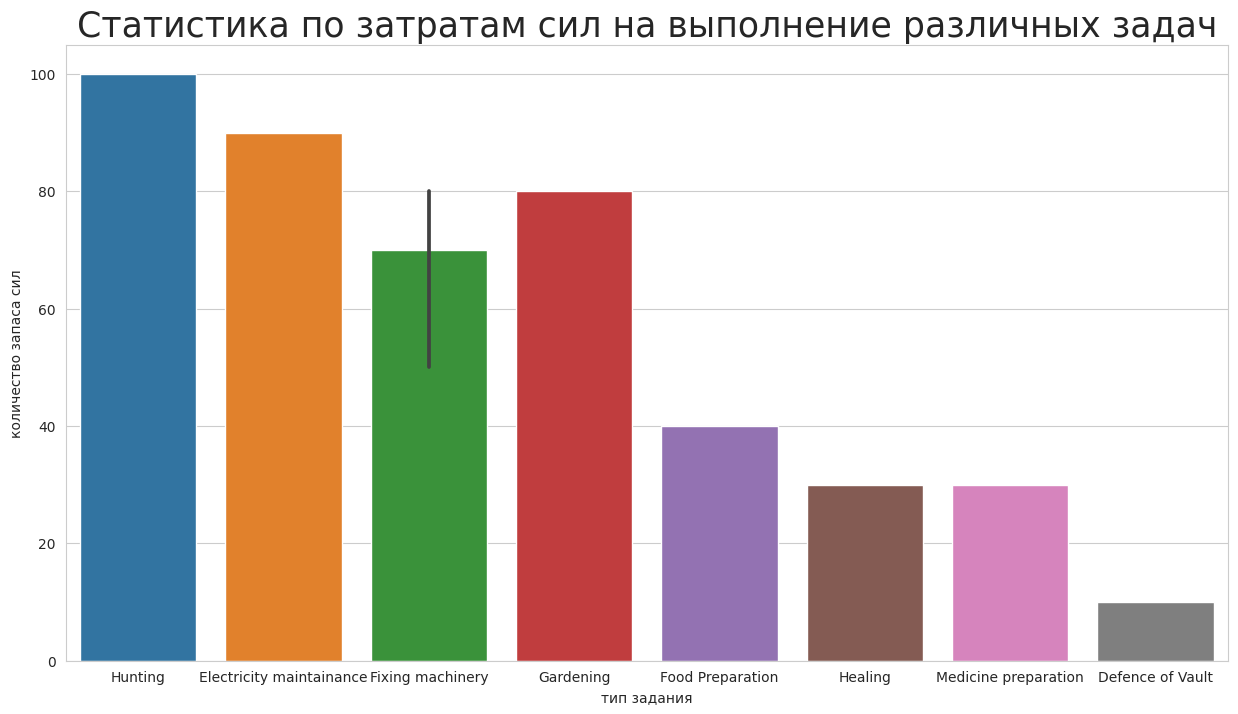

In [34]:
plt.figure(figsize=(15, 8))

with sns.axes_style("whitegrid"):

    sns.barplot(data=appl_data, x='task_type', y='stamina_req')
    plt.title('Статистика по затратам сил на выполнение различных задач', fontsize=25)
    plt.xlabel('тип задания')
    plt.ylabel('количество запаса сил')

    plt.show();

Как видим самая трудоемкая задача это Hunting, а самая легкая это defence of vault

#Потребление провизии по обязанностям

Для каждой из обязанностей вывести наиболее популярную для потребления провизию с количеством человек ее потребляющую. Представим визуализацию с помощью heatmap

In [35]:
prov_data = pd.read_csv('/content/_select_sub_responsibility_sub_prov_type_as_top_food_sub_common__202305121510.csv')
prov_data.head()

,responsibility,top_food,counter
0,Bodyguard,Anchovies,5
1,Bodyguard,Coyote steak,2
2,Bodyguard,Hotdog,7
3,Bodyguard,Mirelurk cake,7
4,Bodyguard,Mutt Chops,6


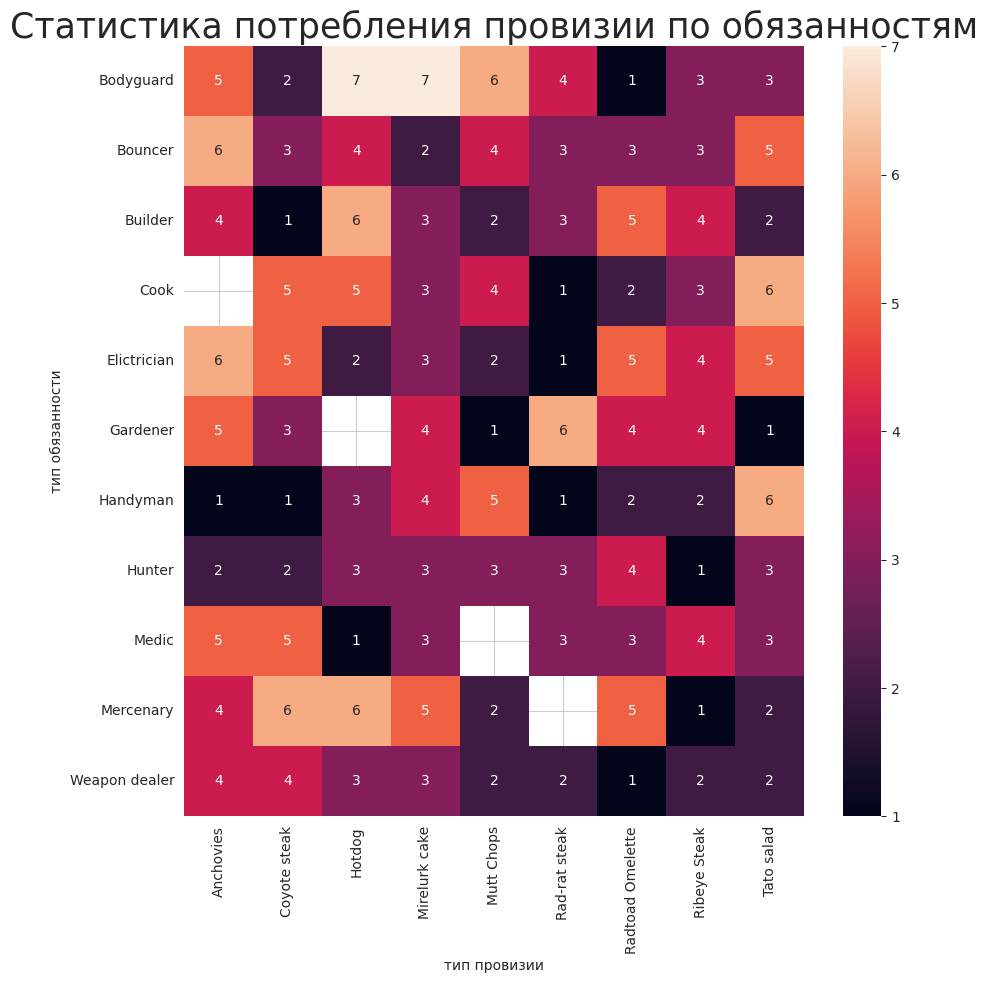

In [36]:
plt.figure(figsize=(10, 10))

with sns.axes_style("whitegrid"):
    pivoted_prov = prov_data.pivot('responsibility', 'top_food', 'counter')

    sns.heatmap(pivoted_prov, annot=True)

    plt.title('Статистика потребления провизии по обязанностям', fontsize=25)
    plt.xlabel('тип провизии')
    plt.ylabel('тип обязанности')

    plt.show();

#Статистика средней боевой силы по виду животного

In [37]:
anim_data = pd.read_csv('/content/_select_a_animal_type_avg_a_fighting_strength_as_strength_from_c_202305121522.csv')
anim_data = anim_data.sort_values(by='strength', ascending=False)
anim_data.head()

,animal_type,strength
3,dog,58.571429
5,cat,57.600000
1,turtle,54.545455
2,fox,52.888889
0,weasel,44.100000


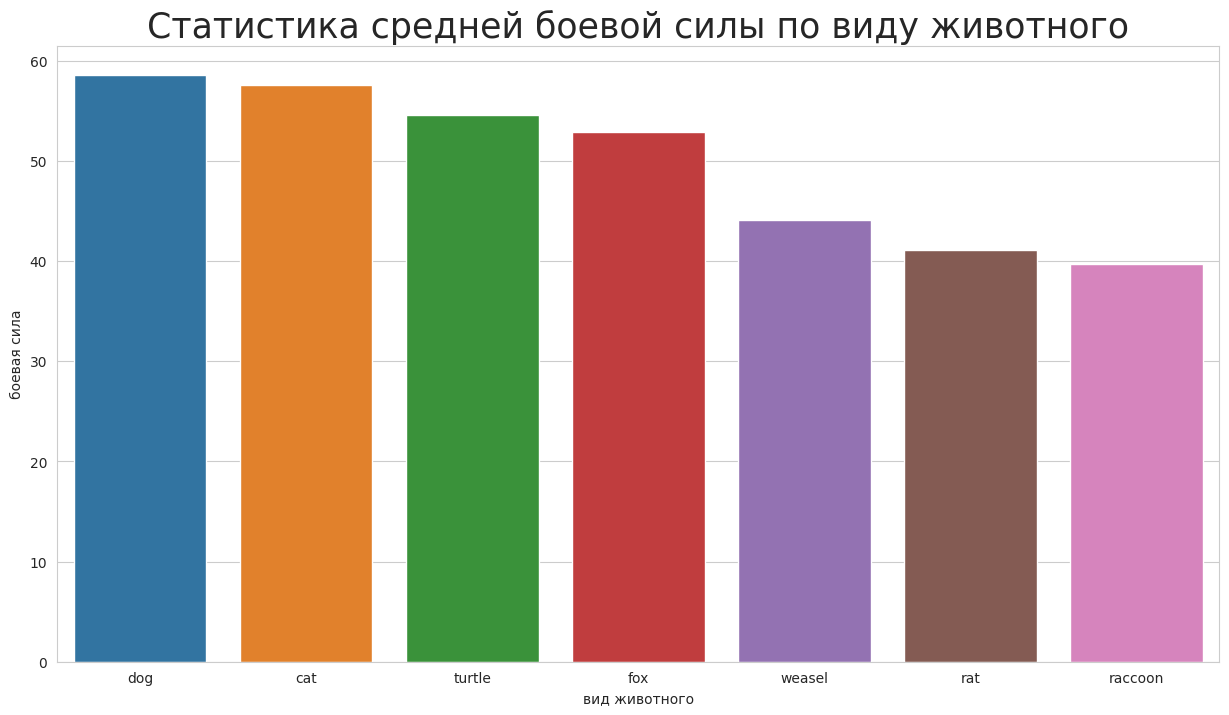

In [38]:
plt.figure(figsize=(15, 8))

with sns.axes_style("whitegrid"):

    sns.barplot(data=anim_data, x='animal_type', y='strength')
    plt.title('Статистика средней боевой силы по виду животного', fontsize=25)
    plt.xlabel('вид животного')
    plt.ylabel('боевая сила')

    plt.show();

По результатам графика наибольшая боевая сила в среднем у собак, наименьшая у енотов

#Плотность распределения уровня радиации и запаса сил среди поселенцев

In [39]:
person_data = pd.read_csv('/content/person_202305121857.csv')
person_data.head()

,radiation_level,stamina
0,32,43
1,36,13
2,47,46
3,3,26
4,25,95


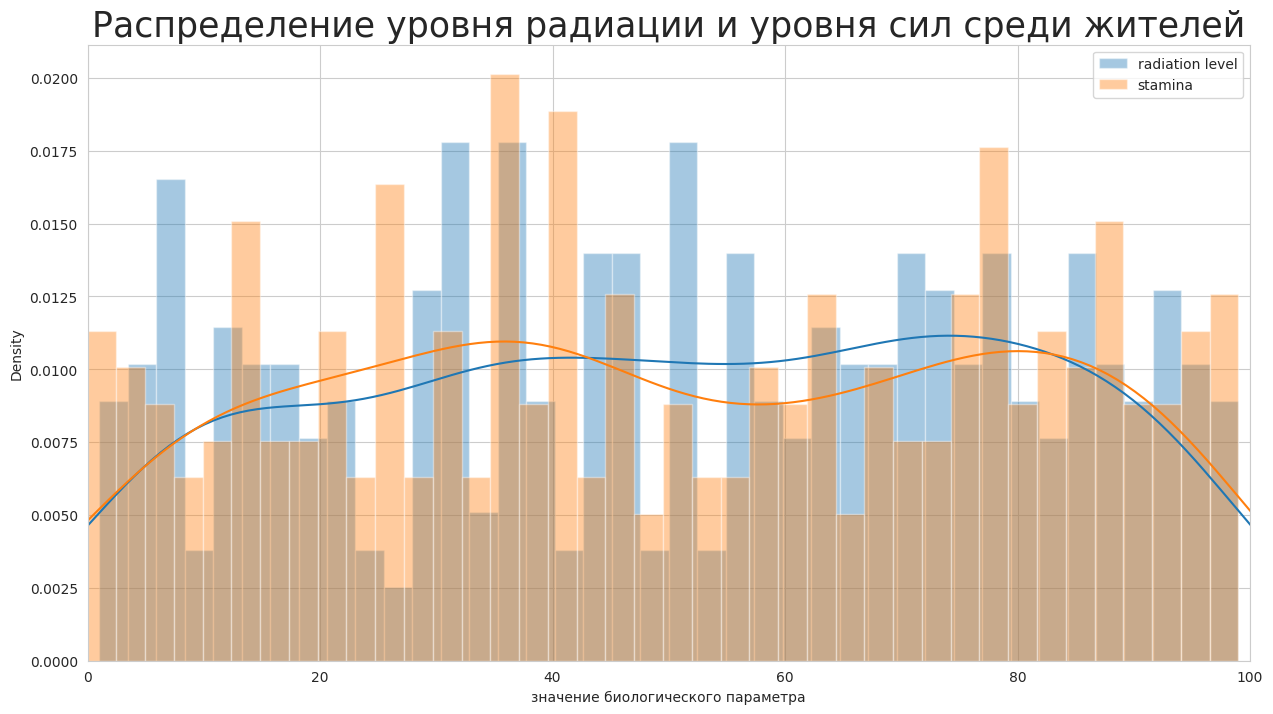

In [45]:
plt.figure(figsize=(15, 8))


with sns.axes_style("whitegrid"):

    sns.distplot(person_data['radiation_level'], bins=40, label='radiation level')
    sns.distplot(person_data['stamina'], bins=40, label='stamina')

    plt.title('Распределение уровня радиации и уровня сил среди жителей', fontsize=25)
    plt.xlabel('значение биологического параметра')
    plt.legend()

    plt.xlim((0, 100))

    plt.show();

На графике наблюдается меньшее количесво людей с очень высокими и очень низкими значениями биологических парамеров